## Importing libraries

In [1]:
import os
import cv2
import numpy as np
from  matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from collections import Counter
import keras_tuner
from keras_tuner.tuners import RandomSearch

## Preparing the training dataset

In [2]:
ds_path = r"C:\Users\badullah\Downloads\Jupyter Notebook\ct\train"

classes = {"normal": 0, "benign": 1, "malignant": 2} 

In [3]:
# Get list of all image file names 

ds_images = [] 

for key in classes.keys(): 

    folder = os.path.join(ds_path, key) 

    images = os.listdir(folder) 

    for img in images: 

        ds_images.append(os.path.join(folder, img)) 

In [4]:
# Create empty arrays for data and labels 

data = [] 

label = [] 

In [5]:
# Loop over all image file names, read images, preprocess them and store in data array 

for img in ds_images: 

    image = cv2.imread(img) 

    # Resize image to desired size
    
    image = cv2.resize(image, (224, 224))  

    # Normalize pixel values
    
    image = image.astype("float32") / 255.0 
    
    # convert the image to grayscale

    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # append the image to the array

    data.append(image) 
    
    # Get corresponding label for image from folder name 

    labels = img.split(os.path.sep)[-2] 

    labels = classes[labels] 

    label.append(labels)

In [6]:
# Convert data and labels to numpy arrays 

X = np.array(data) 

y = np.array(label)

## Divide the dataset into training and testing parts

In [7]:
# split the data into training and testing sets with 40% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


## Checking infos about training and testing data

In [8]:
# print the shape of the train data

print(X_train.shape)
print(y_train.shape)
print(Counter(y_train))
print(X_train.dtype)

(658, 224, 224)
(658,)
Counter({2: 346, 0: 249, 1: 63})
float32


In [9]:
# print the shape of the test data

print(X_test.shape)
print(y_test.shape)
print(Counter(y_test))
print(X_test.dtype)

(439, 224, 224)
(439,)
Counter({2: 215, 0: 167, 1: 57})
float32


## Train a model using basic approach

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, input_shape=(224, 224, 1), activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
21/21 [==============================] - 10s 411ms/step - loss: 10.5606 - accuracy: 0.4787
Epoch 2/5
21/21 [==============================] - 9s 407ms/step - loss: 3.5236 - accuracy: 0.6322
Epoch 3/5
21/21 [==============================] - 10s 480ms/step - loss: 1.1898 - accuracy: 0.7766
Epoch 4/5
21/21 [==============================] - 9s 413ms/step - loss: 0.4764 - accuracy: 0.8359
Epoch 5/5
21/21 [==============================] - 11s 524ms/step - loss: 0.2004 - accuracy: 0.9179


In [11]:
# Evaluating the Keras model

model.evaluate(X_test, y_test)

14/14 [==============================] - 1s 35ms/step - loss: 0.3888 - accuracy: 0.8679


[0.3888333737850189, 0.8678815364837646]

## CNN modelling

In [12]:
model = keras.Sequential([
    keras.layers.Conv2D(64, 3, input_shape=(224, 224, 1), activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
21/21 [==============================] - 97s 5s/step - loss: 3.3163 - accuracy: 0.6505
Epoch 2/5
21/21 [==============================] - 103s 5s/step - loss: 0.1026 - accuracy: 0.9818
Epoch 3/5
21/21 [==============================] - 99s 5s/step - loss: 0.0174 - accuracy: 0.9954
Epoch 4/5
21/21 [==============================] - 89s 4s/step - loss: 0.0058 - accuracy: 0.9985
Epoch 5/5
21/21 [==============================] - 89s 4s/step - loss: 0.0020 - accuracy: 1.0000


In [13]:
# Evaluating the Keras model

model.evaluate(X_test, y_test)

14/14 [==============================] - 14s 972ms/step - loss: 0.0548 - accuracy: 0.9932


[0.05477185174822807, 0.9931662678718567]

In [14]:
# Improving the model

model = keras.Sequential([
    keras.layers.AveragePooling2D(6, 3, input_shape=(224, 224, 1)),
    keras.layers.Conv2D(64, 3, activation='relu'),
    keras.layers.Conv2D(32, 3, activation='relu'),
    keras.layers.MaxPool2D(2, 2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
21/21 [==============================] - 13s 558ms/step - loss: 1.0081 - accuracy: 0.4985
Epoch 2/5
21/21 [==============================] - 13s 606ms/step - loss: 0.8279 - accuracy: 0.5836
Epoch 3/5
21/21 [==============================] - 12s 576ms/step - loss: 0.6768 - accuracy: 0.7128
Epoch 4/5
21/21 [==============================] - 14s 650ms/step - loss: 0.5710 - accuracy: 0.7766
Epoch 5/5
21/21 [==============================] - 14s 659ms/step - loss: 0.4301 - accuracy: 0.8389


In [15]:
# Evaluating the Keras model

model.evaluate(X_test, y_test)

14/14 [==============================] - 2s 155ms/step - loss: 0.4452 - accuracy: 0.8246


[0.44521093368530273, 0.8246013522148132]

## Hyperparameter Tuning

In [23]:
def build_model(hp):
    
    model = keras.Sequential()
    
    model.add(keras.layers.AveragePooling2D(6, 3, input_shape=(224, 224, 1)))
    
    for i in range(hp.Int("Conv layer", min_value=0, max_value=3)):
        model.add(keras.layers.Conv2D(hp.Choice(f"layer_{i}_filters", [16, 32, 64]), 3, activation='relu'))
    
    model.add(keras.layers.MaxPool2D(2, 2))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Flatten())
    
    model.add(keras.layers.Dense(hp.Choice("Dense layer", [64, 128, 256, 512, 1024]), activation='relu'))
    
    model.add(keras.layers.Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics=['accuracy'])
    
    return model

tuner = RandomSearch(
    build_model,
    objective = 'val_accuracy',
    max_trials=5,
    directory='./new_directory'
)

history=tuner.search(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

Trial 5 Complete [00h 00m 27s]
val_accuracy: 0.801822304725647

Best val_accuracy So Far: 0.9772209525108337
Total elapsed time: 00h 11m 13s
INFO:tensorflow:Oracle triggered exit


In [24]:
best_model = tuner.get_best_models()[0]

In [25]:
best_model.evaluate(X_test, y_test)

14/14 [==============================] - 1s 83ms/step - loss: 0.0908 - accuracy: 0.9772


[0.09084389358758926, 0.9772209525108337]

In [26]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 average_pooling2d (AverageP  (None, 73, 73, 1)        0         
 ooling2D)                                                       
                                                                 
 conv2d (Conv2D)             (None, 71, 71, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 16)        2320      
                                                                 
 conv2d_2 (Conv2D)           (None, 67, 67, 16)        2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 33, 33, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0

In [27]:
tuner.results_summary()

Results summary
Results in ./new_directory\untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
Conv layer: 3
Dense layer: 64
layer_0_filters: 16
layer_1_filters: 16
layer_2_filters: 16
Score: 0.9772209525108337

Trial 1 summary
Hyperparameters:
Conv layer: 2
Dense layer: 1024
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 64
Score: 0.9772209525108337

Trial 2 summary
Hyperparameters:
Conv layer: 2
Dense layer: 64
layer_0_filters: 32
layer_1_filters: 64
layer_2_filters: 64
Score: 0.9703872203826904

Trial 3 summary
Hyperparameters:
Conv layer: 0
Dense layer: 512
layer_0_filters: 32
layer_1_filters: 16
layer_2_filters: 64
Score: 0.8132118582725525

Trial 4 summary
Hyperparameters:
Conv layer: 0
Dense layer: 256
layer_0_filters: 64
layer_1_filters: 32
layer_2_filters: 64
Score: 0.801822304725647


## Plot image from Numpy Array

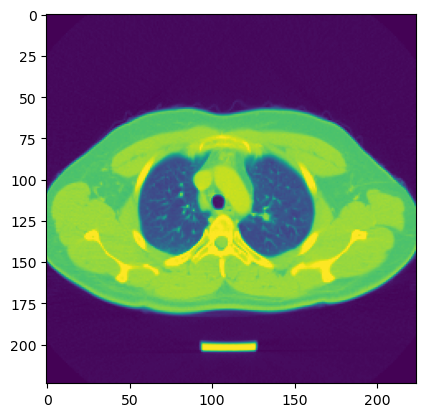

In [28]:
plt.imshow(X_train[0])

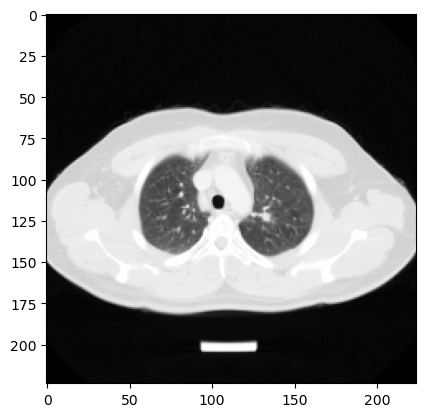

In [29]:
plt.imshow(X_train[0], cmap='Greys_r')